In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

/home/156/jm5970/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_1yrs.nc')
u_mean=squeeze(ncfile.variables['U_mean'][:])
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_1yrs.nc')
v_mean=squeeze(ncfile.variables['V_mean'][:])


(<matplotlib.figure.Figure at 0x7f09bb174dd8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0973fffef0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7f0973edf278>]], dtype=object))

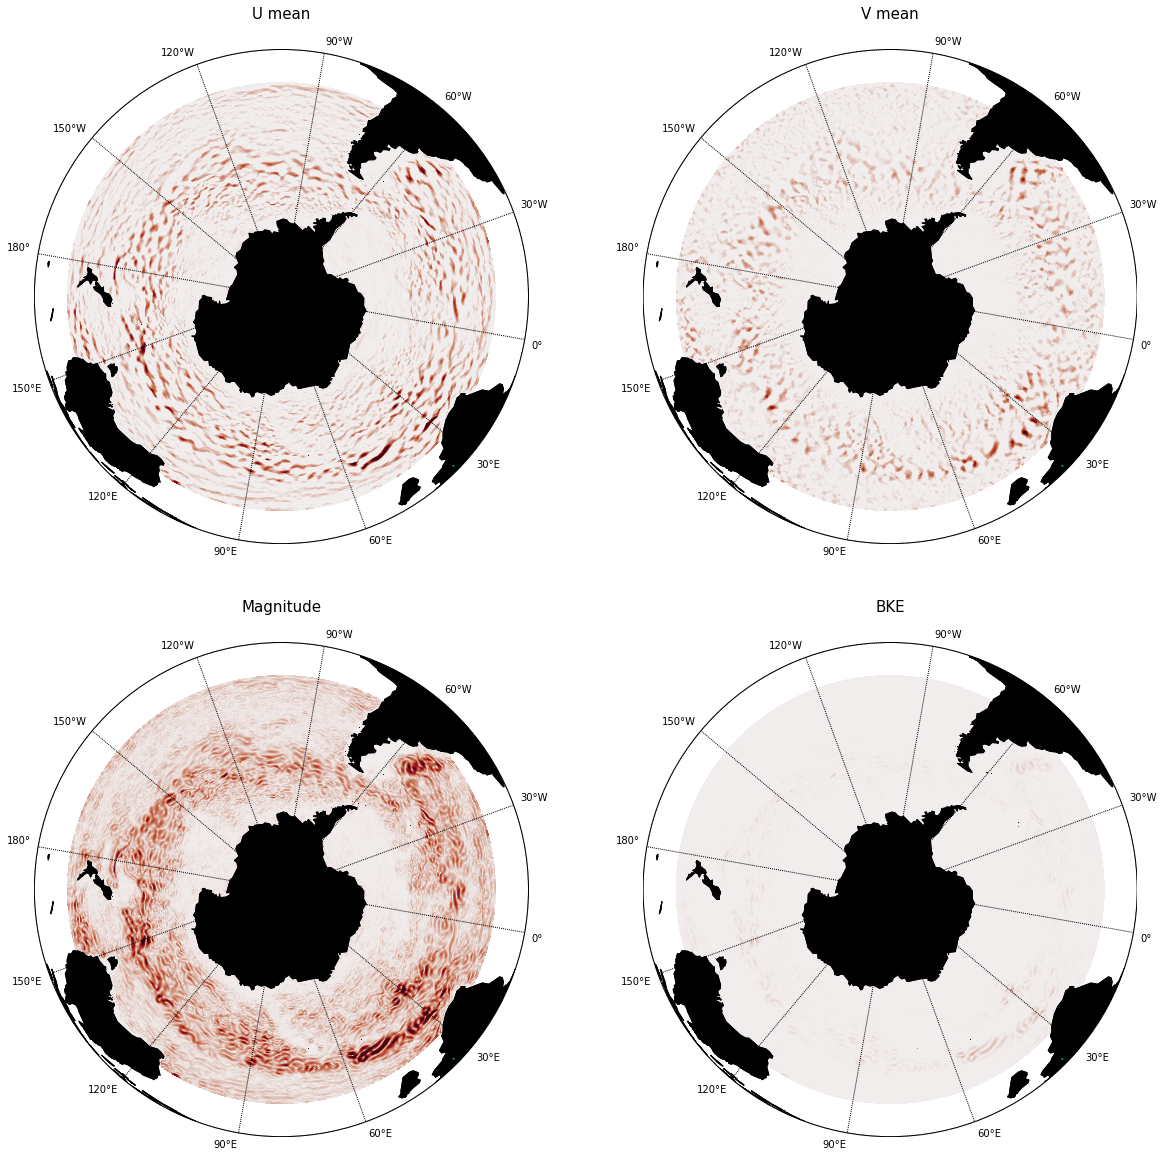

In [3]:
basemap_mplot(lon,lat,[u_mean,v_mean,sqrt(u_mean**2+v_mean**2),KE(u_mean,v_mean)],\
              title=["U mean","V mean","Magnitude","BKE"],scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=15)

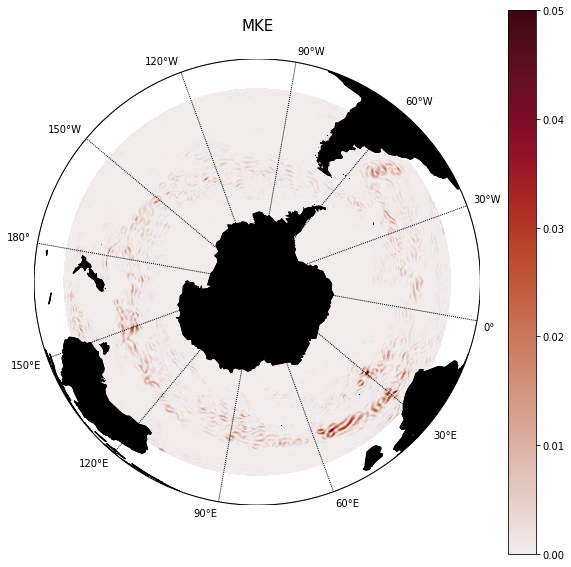

In [4]:
basemap_mplot(lon,lat,KE(u_mean,v_mean),\
              title="MKE",scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.05,xan=1,yan=1,figsize=(10,10),fontsize=15)
colorbar()

In [5]:
name='EKE'
units='m^2/S^2'
nc_description='EKE of the Southern Ocean of January over 1 years'
dim='2D'
index=0
eke_mean=zeros(365)
for ii in range(6,10):
    print('File:',ii)
    ufilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_30'+str(ii)+'_u_1yrs.nc')
    u_prime=squeeze(ufilename.variables['U'][:])
    vfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_30'+str(ii)+'_v_1yrs.nc')
    v_prime=squeeze(vfilename.variables['V'][:])

    eke=zeros([shape(v_prime)[0],shape(v_prime)[1],shape(v_prime)[2]])

    for tt in range(0,shape(v_prime)[0]):
        eke_c=np.array(KE(u_prime[tt,:,:],v_prime[tt,:,:]))
        eke[tt,:,:]=eke_c
        eke_mean[index]=np.nanmean(eke_c)
        index=index+1
    ekefilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_30'+str(ii)+'.nc'
    vargeonc(ekefilename,lat,lon,eke,shape(eke)[0],name,nc_description=nc_description,units=units,dt='',dim=dim)    

File: 6
90
File: 7
91
File: 8
92
File: 9
92


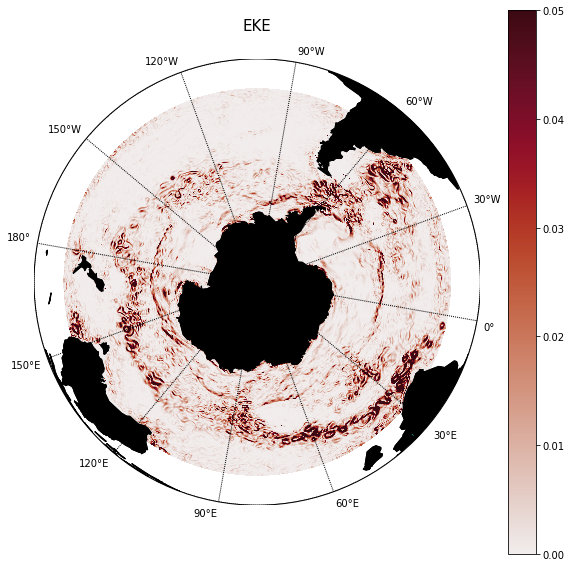

In [ ]:
basemap_mplot(lon,lat,KE(u_prime[0,:,:],v_prime[0,:,:]),\
              title="EKE",scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.05,xan=1,yan=1,figsize=(10,10),fontsize=15)
colorbar()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,eke[0,:,:],shading='gouraud',cmap=cm.cm.amp,\
              vmin=0,vmax=0.05)
cb1 = fig.colorbar(quad1,ax=ax1)

def init():
    quad1.set_array([])
    return quad1

def animate(iter):
    quad1.set_array(eke[iter,:,:].ravel())
    ax1.set_title('%03d'%(iter))
    return quad1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

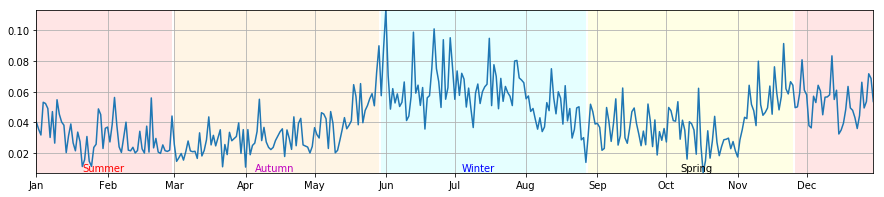

In [7]:
numdays=365
base = datetime.datetime(1992, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]

#figure(figsize=(15,3))
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(date_list,eke_mean,'-')

plt.text(date_list[20], 0.008,'Summer',color='red')
fill_between(date_list[0:60], eke_mean.min(), eke_mean.max(), facecolor='red', alpha=0.1)
plt.text(date_list[95], 0.008,'Autumn',color='m')
fill_between(date_list[60:150], eke_mean.min(), eke_mean.max(), facecolor='orange', alpha=0.1)
plt.text(date_list[185], 0.008,'Winter',color='Blue')
fill_between(date_list[150:240], eke_mean.min(), eke_mean.max(), facecolor='cyan', alpha=0.1)
plt.text(date_list[280], 0.008,'Spring',color='Black')
fill_between(date_list[240:330], eke_mean.min(), eke_mean.max(), facecolor='yellow', alpha=0.1)
fill_between(date_list[330:], eke_mean.min(), eke_mean.max(), facecolor='red', alpha=0.1)
ax.grid(True)
ax.set_xlim(date_list[0],date_list[-1])
ax.set_ylim(eke_mean.min(), eke_mean.max())

monthsFmt = DateFormatter("%b")
axseasonals.xaxis.set_major_formatter(monthsFmt)

In [3]:
outfile='/g/data/v45/jm5970/trackeddy_out/'
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])

name='EKE_eddy'
units='m^2/s^2'
nc_description='EKE of the Southern Ocean of January over 1 years'
dim='2D'

for ii in range(6,10):
#for ii in range(9,10):
    print('File: 30'+str(ii))
    read_dictionary1 = np.load(outfile+'30'+str(ii)+'_pos.npy')
    eddytd=read_dictionary1.item()
    
    read_dictionary1n = np.load(outfile+'30'+str(ii)+'_neg.npy')
    eddytdn=read_dictionary1n.item()
    
    outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output30'+str(ii)+'/'
    ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
    ssha=(ncfile.variables['eta_t'][:]*100)-ssh_mean
    
    ekefilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_30'+str(ii)+'.nc')
    eke=ekefilename.variables['EKE'][:]
    
    threshold=3
    eke_eddy=exeddydt(eddytd,lat,lon,eke,threshold,inside=ssha[:,:,:],diagnostics=False)
    eke_back=eke-eke_eddy
    
    eke_eddyfilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_30'+str(ii)+'.nc'
    vargeonc(eke_eddyfilename,lat,lon,eke_eddy,shape(eke)[0],name,\
             nc_description=nc_description,units=units,dt='',dim=dim)  
    eke_eddyfilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_back_30'+str(ii)+'.nc'
    vargeonc(eke_eddyfilename,lat,lon,eke_back,shape(eke_back)[0],name,\
             nc_description=nc_description,units=units,dt='',dim=dim)

File: 306
*******Removing of eddies******
*******End the Removing of eddies******
90
90
File: 307
*******Removing of eddies******
*******End the Removing of eddies******
91
91
File: 308
*******Removing of eddies******
*******End the Removing of eddies******
92
92
File: 309
*******Removing of eddies******
*******End the Removing of eddies******
92
92


In [ ]:
eke_filenane=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_306.nc')
eke=eke_filenane.variables['EKE'][:]
eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_306.nc')
eke_eddy=eke_eddyfilename.variables['EKE_eddy'][:]
eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_back_306.nc')
eke_back=eke_eddyfilename.variables['EKE_eddy'][:]

In [ ]:
basemap_mplot(lon,lat,[eke[0,:,:],eke_eddy[0,:,:],eke_back[0,:,:]],\
              title=["EKE","EKE{_eddy}","BKE{_eddy}"],scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.000005,xan=3,yan=1,figsize=(15,30),fontsize=15)

In [ ]:
name='EKE_eddy'
units='m^2/s^2'
nc_description='EKE of the Southern Ocean of January over 1 years'
dim='2D'

for ii in range(6,10):
    print('File: 30'+str(ii))
    eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_30'+str(ii)+'.nc')
    eke=eke_eddyfilename.variables['EKE'][:]
    eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_back_30'+str(ii)+'.nc')
    eke_back=eke_eddyfilename.variables['EKE_eddy'][:]
    
    eke_eddy=eke-eke_back
    
    eke_eddyfilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_30'+str(ii)+'.nc'
    vargeonc(eke_eddyfilename,lat,lon,eke_eddy,shape(eke)[0],name,\
             nc_description=nc_description,units=units,dt='',dim=dim)  


In [ ]:
eke_eddy_mean=zeros([365])
index=0
for ii in range(6,10):
    print('File: 30'+str(ii))
    eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_30'+str(ii)+'.nc')
    eke_eddy=eke_eddyfilename.variables['EKE_eddy'][:]
    eke_eddy[eke_eddy==0]=np.nan
    for ii in range(0,shape(eke_eddy)[0]):
        eke_eddy_mean[index]=np.nanmean(eke_eddy[ii,:,:])
        index=index+1

In [ ]:
count=0
for ii in range(0,len(eke_eddy_mean)):
    if eke_eddy_mean[ii]==0:
        eke_eddy_mean[ii]=nan
        count=count+1
print(count)
len(eke_eddy_mean)

In [ ]:
-

In [ ]:
eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_306.nc')
eke=eke_eddyfilename.variables['EKE'][:]
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])/100

areamap=array([[0,len(lon)],[0,len(lat)]])
ssha=eta-ssh_mean

eddytd=analyseddyzt(eta,lon,lat,0,1,1,0.4,0.05,0.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=0.95,ellipsrsquarefit=0.65,gaussrsquarefit=0.65\
                    ,destdir='',physics='',diagnostics=False,pprint=False)
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-0.4,-0.05,-0.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=0.95,ellipsrsquarefit=0.65,gaussrsquarefit=0.65\
                    ,destdir='',physics='',diagnostics=False,pprint=False)

eke_eddyp=exeddydt(eddytd,lat,lon,eke,1,inside=ssha[:,:,:],diagnostics=False)
eke_eddyn=exeddydt(eddytdn,lat,lon,eke,1,inside=ssha[:,:,:],diagnostics=False)

eke_eddy=eke_eddyp+eke_eddyn

eke_back=eke-(eke_eddy)

In [ ]:
basemap_mplot(lon,lat,[eke[0,:,:],eke_eddy[0,:,:],eke_back[0,:,:]],\
              title=["EKE","EKE{_eddy}","BKE{_eddy}"],scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=0.000005,xan=3,yan=1,figsize=(15,30),fontsize=15)